In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import spacy
import re
from pprint import pprint

import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords

from collections import Counter
from wordcloud import WordCloud


import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\sync\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [5]:
df_training = pd.read_pickle('training.pkl')

In [6]:
df_training

,id,labels,text,tidy_Text,tidy_Text_tokens,tokens_no_stop,no_stop_joined
0,128,[Black-and-white Fallacy/Dictatorship],THERE ARE ONLY TWO GENDERS\n\nFEMALE \n\nMALE\n,there only genders female male,"[there, only, genders, female, male]","[genders, female, male]",genders female male
1,189,[],This is not an accident!,this accident,"[this, accident]",[accident],accident
2,96,"[Loaded Language, Name calling/Labeling, Sloga...",SO BERNIE BROS HAVEN'T COMMITTED VIOLENCE EH?\...,bernie bros haven committed violence power com...,"[bernie, bros, haven, committed, violence, pow...","[bernie, bros, committed, violence, power, com...",bernie bros committed violence power comes bar...
3,154,"[Causal Oversimplification, Loaded Language, N...",PATHETIC\n\nThe Cowardly Asshole\nWeak Failure...,pathetic cowardly asshole weak failure impeach...,"[pathetic, cowardly, asshole, weak, failure, i...","[pathetic, cowardly, asshole, weak, failure, i...",pathetic cowardly asshole weak failure impeach...
4,15,[],WHO TRUMP REPRESENTS\n\nWHO DEMOCRATS REPRESENT\n,trump represents democrats represent,"[trump, represents, democrats, represent]","[trump, represents, democrats, represent]",trump represents democrats represent
...,...,...,...,...,...,...,...
683,501_batch_2,[Smears],"HOW TO KILL THE CORONOVIRUS...\nHey Hillary, I...",kill coronovirus hillary hear coronavirus goin...,"[kill, coronovirus, hillary, hear, coronavirus...","[kill, coronovirus, hillary, hear, coronavirus...",kill coronovirus hillary hear coronavirus goin...
684,508_batch_2,[],"LOOK, WHEN I'M IN THE WAFFLE HOUSE, I'M GOING ...",look when waffle house going white house honey...,"[look, when, waffle, house, going, white, hous...","[look, waffle, house, going, white, house, hon...",look waffle house going white house honey whit...
685,509_batch_2,"[Loaded Language, Name calling/Labeling]",I support MLB\n\nIt's BLM you idiot,support idiot,"[support, idiot]","[support, idiot]",support idiot
686,510_batch_2,[Loaded Language],"PELOSI ENDORSES BIDEN\n""He is a leader who is ...",pelosi endorses biden leader personification h...,"[pelosi, endorses, biden, leader, personificat...","[pelosi, endorses, biden, leader, personificat...",pelosi endorses biden leader personification h...


In [7]:
df_training.shape

(688, 7)

In [8]:
df_training = df_training.drop(['tidy_Text','tidy_Text_tokens','no_stop_joined'], axis=1)

In [9]:
df_training.head()

,id,labels,text,tokens_no_stop
0,128,[Black-and-white Fallacy/Dictatorship],THERE ARE ONLY TWO GENDERS\n\nFEMALE \n\nMALE\n,"[genders, female, male]"
1,189,[],This is not an accident!,[accident]
2,96,"[Loaded Language, Name calling/Labeling, Sloga...",SO BERNIE BROS HAVEN'T COMMITTED VIOLENCE EH?\...,"[bernie, bros, committed, violence, power, com..."
3,154,"[Causal Oversimplification, Loaded Language, N...",PATHETIC\n\nThe Cowardly Asshole\nWeak Failure...,"[pathetic, cowardly, asshole, weak, failure, i..."
4,15,[],WHO TRUMP REPRESENTS\n\nWHO DEMOCRATS REPRESENT\n,"[trump, represents, democrats, represent]"


remove links

In [10]:
def remove_links(tweet):
    tweet_no_link = re.sub(r"http\S+", "", tweet)
    return tweet_no_link

In [13]:
df_training['text_p'] = np.vectorize(remove_links)(df_training['text'])

In [14]:
def remove_links(tweet):
    tweet_no_link = re.sub(r"twitter.com\S+", "", tweet)
    return tweet_no_link

In [16]:
df_training['text_p'] = np.vectorize(remove_links)(df_training['text_p'])

remove users

In [18]:
def remove_users(tweet, pattern1, pattern2):
    r = re.findall(pattern1, tweet)
    for i in r:
        tweet = re.sub(i, '', tweet)
    
    r = re.findall(pattern2, tweet)
    for i in r:
        tweet = re.sub(i, '', tweet)
    return tweet

In [19]:
df_training['text_p'] = np.vectorize(remove_users)(df_training['text_p'], "@ [\w]*", "@[\w]*")

not removing '#

In [21]:
# It adds to the neutrality of the tweet as the compound score is the sum of all words sentiment score. 
# Example df.tweet_text[43]
def remove_word(tweet, pattern1, pattern2):
    r = re.findall(pattern1, tweet)
    for i in r:
        tweet = re.sub(i, "", tweet)
    r = re.findall(pattern2, tweet)
    for i in r:
        tweet = re.sub(i, '', tweet)
    return tweet

note removing any words as of now

remove any dups

In [22]:
df_training.drop_duplicates(subset=['text_p'], keep='first', inplace=True)

In [24]:
df_training = df_training[~df_training.text_p.str.contains("Retweeted")]

In [25]:
df_training.shape

(688, 5)

vader sentimemnt analyzer

In [28]:
# Create an object of Vader Sentiment Analyzer
vader_analyzer = SentimentIntensityAnalyzer()

In [29]:
negative = []
neutral = []
positive = []
compound = []

In [31]:
def sentiment_scores(df, negative, neutral, positive, compound):
    for i in df['text_p']:
        sentiment_dict = vader_analyzer.polarity_scores(i)
        negative.append(sentiment_dict['neg'])
        neutral.append(sentiment_dict['neu'])
        positive.append(sentiment_dict['pos'])
        compound.append(sentiment_dict['compound'])

In [32]:
# Function calling 
sentiment_scores(df_training, negative, neutral, positive, compound)

In [33]:
# Prepare columns to add the scores later
df_training["negative"] = negative
df_training["neutral"] = neutral
df_training["positive"] = positive
df_training["compound"] = compound

In [35]:
# Fill the overall sentiment with encoding:
# (-1)Negative, (0)Neutral, (1)Positive
sentiment = []
for i in df_training['compound']:
    if i >= 0.05 : 
        sentiment.append(1)
  
    elif i <= - 0.05 : 
        sentiment.append(-1) 
        
    else : 
        sentiment.append(0)
df_training['sentiment'] = sentiment

In [36]:
neg_tweets = df_training.sentiment.value_counts()[-1]
neu_tweets = df_training.sentiment.value_counts()[0]
pos_tweets = df_training.sentiment.value_counts()[1]

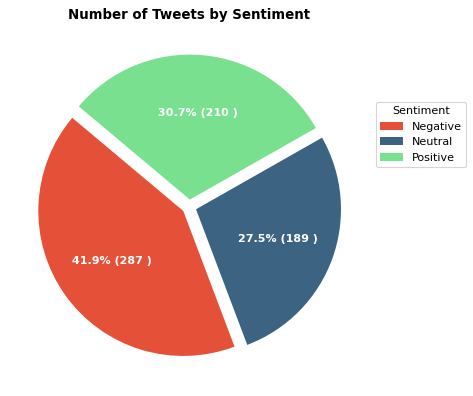

In [37]:
# Draw Plot
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw=dict(aspect="equal"), dpi= 80)

data = [df_training.sentiment.value_counts()[-1], df_training.sentiment.value_counts()[0], df_training.sentiment.value_counts()[1]]
categories = ['Negative', 'Neutral', 'Positive']
explode = [0.05,0.05,0.05]

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}% ({:d} )".format(pct, absolute)

wedges, texts, autotexts = ax.pie(data, 
                                  autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"), 
                                  colors=['#e55039', '#3c6382', '#78e08f'],
                                  startangle=140,
                                  explode=explode)

# Decoration
ax.legend(wedges, categories, title="Sentiment", loc="center left", bbox_to_anchor=(1, 0.2, 0.5, 1))
plt.setp(autotexts, size=10, weight=700)
ax.set_title("Number of Tweets by Sentiment", fontsize=12, fontweight="bold")
plt.show()

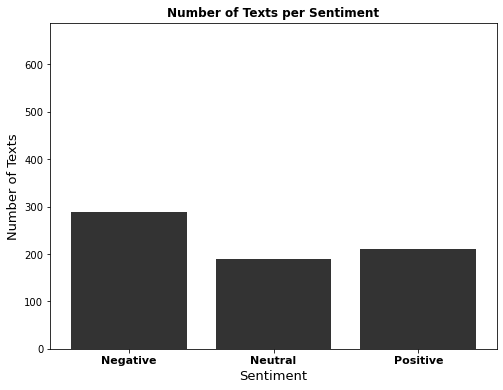

In [40]:
labels = ['Negative', 'Neutral', 'Positive']
freq = [df_training.sentiment.value_counts()[-1], df_training.sentiment.value_counts()[0], df_training.sentiment.value_counts()[1]]
index = np.arange(len(freq))

plt.figure(figsize=(8,6))
plt.bar(index, freq, alpha=0.8, color= 'black')
plt.xlabel('Sentiment', fontsize=13)
plt.ylabel('Number of Texts', fontsize=13)
plt.xticks(index, labels, fontsize=11, fontweight="bold") 
plt.title('Number of Texts per Sentiment', fontsize=12, fontweight="bold")
plt.ylim(0, len(df_training['text']))
plt.show()

In [41]:
# We remove the neutral compound scores to compare the negative and positive tweets
data = df_training[(df_training["sentiment"]!=0)]

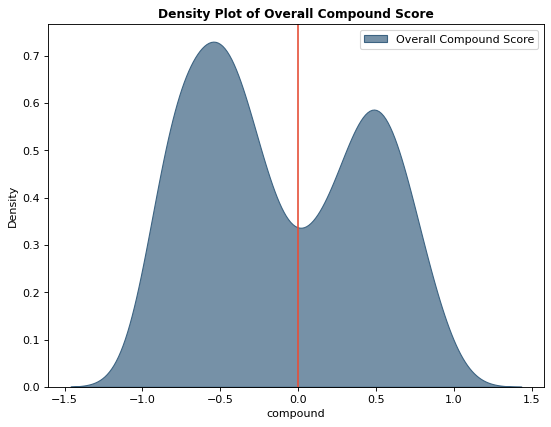

In [42]:
# Draw Plot
plt.figure(figsize=(8,6), dpi= 80)
sns.kdeplot(data["compound"], shade=True, color="#3c6382", label="Overall Compound Score", alpha=.7)

# Decoration
plt.title('Density Plot of Overall Compound Score', fontsize=11, fontweight='bold')
plt.axvline(x=0, color='#e55039')
plt.legend()
plt.show()

lemmatization

In [43]:
def lemmatization(tweets, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    tweets_out = []
    for sent in tweets:
        doc = nlp(" ".join(sent)) 
        tweets_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return tweets_out

In [46]:
# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

In [53]:
# Do lemmatization keeping only noun, adj, vb, adv
df_training['lemmatized'] = lemmatization(df_training['tokens_no_stop'], allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

In [54]:
df_training.drop(['tokens_no_stop'], axis=1, inplace=True)

In [55]:
df_pos = df_training[df_training['sentiment']==1]
df_neg = df_training[df_training['sentiment']==(-1)]

In [56]:
df_pos.head()

,id,labels,text,text_p,negative,neutral,positive,compound,sentiment,lemmatized
1,189,[],This is not an accident!,This is not an accident!,0.000,0.584,0.416,0.4303,1,[accident]
2,96,"[Loaded Language, Name calling/Labeling, Sloga...",SO BERNIE BROS HAVEN'T COMMITTED VIOLENCE EH?\...,SO BERNIE BROS HAVEN'T COMMITTED VIOLENCE EH?\...,0.135,0.768,0.097,0.1129,1,"[commit, violence, power, come, barrel, comrad..."
5,169,"[Appeal to fear/prejudice, Causal Oversimplifi...",Our elders were called to war to save lives.\n...,Our elders were called to war to save lives.\n...,0.121,0.681,0.198,0.3612,1,"[elder, call, save, life, call, couch, save]"
13,175,"[Loaded Language, Name calling/Labeling]","A society that keeps cures a secret, in an eff...","A society that keeps cures a secret, in an eff...",0.000,0.822,0.178,0.6369,1,"[society, keep, cure, secret, effort, sell, me..."
16,66,"[Appeal to fear/prejudice, Loaded Language, Sl...",UN\n\nNew York UN Office Recruits Paramilitary...,UN\n\nNew York UN Office Recruits Paramilitary...,0.000,0.820,0.180,0.5766,1,"[recruit, paramilitary, troop, disarmament, re..."


word cloud

In [57]:
# Join the tweet back together
def rejoin_words(row):
    words = row['lemmatized']
    joined_words = (" ".join(words))
    return joined_words

In [58]:
all_words_pos = ' '.join([text for text in df_pos.apply(rejoin_words, axis=1)])
all_words_neg = ' '.join([text for text in df_neg.apply(rejoin_words, axis=1)])

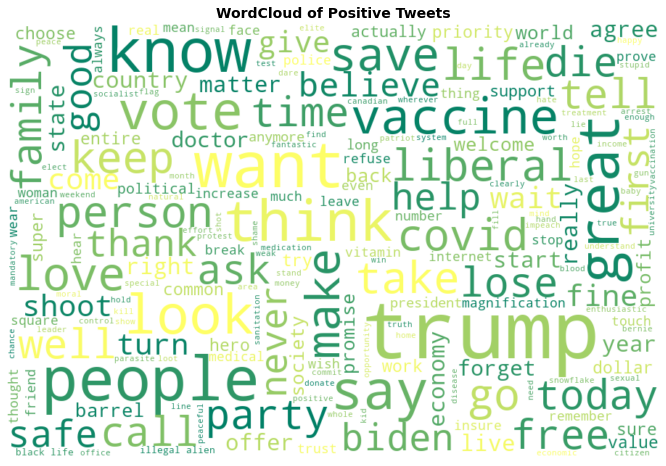

In [59]:
wordcloud = WordCloud(width=900, height=600, random_state=21, max_font_size=110, background_color='white', 
                      max_words=200,colormap='summer').generate(all_words_pos)

plt.figure(figsize=(12, 8))
plt.title('WordCloud of Positive Tweets', fontsize=14, fontweight="bold")
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

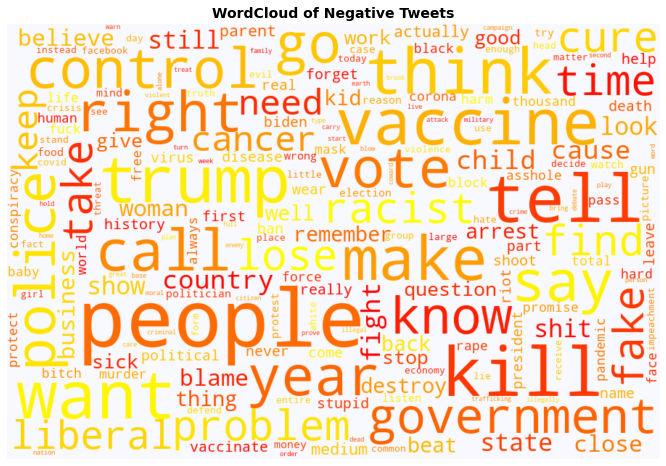

In [60]:
wordcloud = WordCloud(width=900, height=600, random_state=21, max_font_size=110, background_color='ghostwhite', 
                      max_words=200,colormap='autumn').generate(all_words_neg)

plt.figure(figsize=(12, 8))
plt.title('WordCloud of Negative Tweets', fontsize=14, fontweight="bold")
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

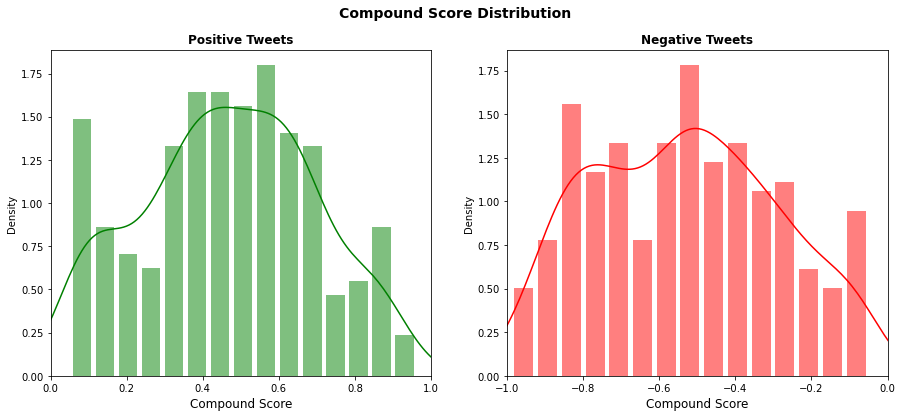

In [61]:
x1 = df_pos['compound']
x2 = df_neg['compound']
plt.figure(figsize=(15,6))
plt.suptitle('Compound Score Distribution', fontsize=14, fontweight="bold")
plt.subplot(1,2,1)

sns.distplot(x1, color="g", bins=15, hist_kws={"alpha": 0.5,"rwidth":0.8})
plt.title('Positive Tweets',fontsize=12, fontweight="bold")
plt.xlabel("Compound Score", fontsize=12)
plt.xlim([0,1])

# Chart 2: Derivative Function
plt.subplot(1,2,2)
sns.distplot(x2, color="r", bins=15, hist_kws={"alpha": 0.5, "rwidth":0.8})
plt.title("Negative Tweets",fontsize=12, fontweight="bold")
plt.xlabel("Compound Score", fontsize=12)
plt.xlim([-1,0])

plt.show()

In [62]:
x1.describe()

count    211.000000
mean       0.466707
std        0.225121
min        0.051600
25%        0.318200
50%        0.475300
75%        0.636500
max        0.960700
Name: compound, dtype: float64

In [63]:
x2.describe()

count    288.000000
mean      -0.533903
std        0.241248
min       -0.987300
25%       -0.737075
50%       -0.531900
75%       -0.361200
max       -0.051600
Name: compound, dtype: float64

boxplot

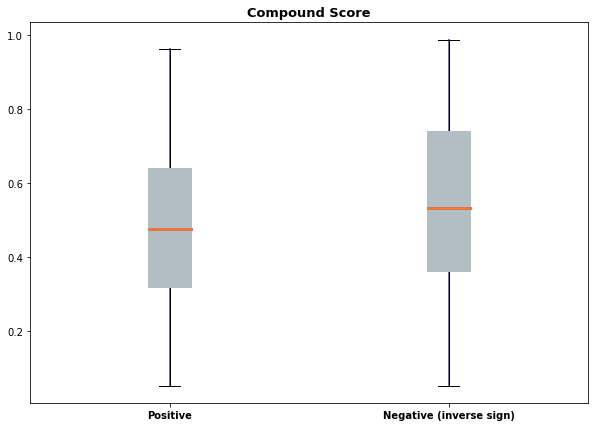

In [103]:
data_to_plot = [x1,(x2)*-1]
# Box-plot
fig = plt.figure(1, figsize=(10, 7))
ax = fig.add_subplot(111)

bp = ax.boxplot(data_to_plot, patch_artist=True)

for box in bp['boxes']:
    # change outline color
    box.set( color='#b2bec3', linewidth=2)
    
    
## change color and linewidth of the whiskers
for whisker in bp['whiskers']:
    whisker.set(color='#7570b3', linewidth=2)
for median in bp['medians']:
    median.set(color='#e17055', linewidth=3)
    

plt.boxplot(data_to_plot)
plt.title('Compound Score', fontsize=13, fontweight='bold')
ax.set_xticks([1, 2])
ax.set_xticklabels(['Positive', 'Negative (inverse sign)'], fontweight='bold')

plt.show()





Top 10 Positive Text

In [89]:
# 10 Most positive Text
df_pos.sort_values('compound', inplace=True, ascending=False)
df_pos.reset_index(drop=True, inplace=True)

In [90]:
df_pos.head(10)

,id,labels,text,text_p,negative,neutral,positive,compound,sentiment,lemmatized
0,60,[Loaded Language],What people think super heroes look like:\n\nW...,What people think super heroes look like:\n\nW...,0.000,0.265,0.735,0.9607,1,"[people, think, super, hero, look, super, hero..."
1,376_batch_2,"[Loaded Language, Name calling/Labeling]",My greatest wish right now is for Trump to get...,My greatest wish right now is for Trump to get...,0.000,0.656,0.344,0.9118,1,"[great, wish, right, trump, well, donate, plas..."
2,510_batch_2,[Loaded Language],"PELOSI ENDORSES BIDEN\n""He is a leader who is ...","PELOSI ENDORSES BIDEN\n""He is a leader who is ...",0.084,0.484,0.432,0.9049,1,"[biden, leader, hope, courage, value, integrit..."
3,463_batch_2,[Smears],I am SO EXCITED that we get to watch Kamala Ha...,I am SO EXCITED that we get to watch Kamala Ha...,0.000,0.741,0.259,0.8793,1,"[swear, woman, card, time, ahead]"
4,152,"[Flag-waving, Slogans, Smears]","""Yes, Mr. Trump, let's make America great agai...","""Yes, Mr. Trump, let's make America great agai...",0.000,0.664,0.336,0.8779,1,"[great, great, elect]"
5,879_batch_2,"[Loaded Language, Name calling/Labeling, Smears]",Did you hear Trump in today's briefing when he...,Did you hear Trump in today's briefing when he...,0.067,0.581,0.352,0.8689,1,"[today, offer, heartfelt, sympathy, family, lo..."
6,416_batch_2,"[Glittering generalities (Virtue), Loaded Lang...","I DON'T ALWAYS GET IMPEACHED\n\nBUT WHEN I DO,...","I DON'T ALWAYS GET IMPEACHED\n\nBUT WHEN I DO,...",0.000,0.615,0.385,0.8674,1,"[always, impeach, nominate, peace, reelect]"
7,453_batch_2,"[Exaggeration/Minimisation, Glittering general...",Brilliant Trump Puts Himself On All Postage St...,Brilliant Trump Puts Himself On All Postage St...,0.000,0.673,0.327,0.8668,1,"[brilliant, trump, put, postage, stamp, force,..."
8,276_batch_2,"[Flag-waving, Slogans]",HAPPY 4TH PATRIOTS!\n\nMAKE AMERICA GREAT AGAIN!,HAPPY 4TH PATRIOTS!\n\nMAKE AMERICA GREAT AGAIN!,0.000,0.374,0.626,0.8550,1,"[happy, patriot, make, great]"
9,68_batch_2,"[Flag-waving, Slogans]",HEY LIBERALS \nWE CHANGED THE FLAG FOR YOU LIK...,HEY LIBERALS \nWE CHANGED THE FLAG FOR YOU LIK...,0.000,0.609,0.391,0.8540,1,"[liberal, change, flag, keep, great]"


Top 10 Negative

In [91]:
# 10 Most Negative Tweets
df_neg.sort_values('compound', inplace=True)
df_neg.reset_index(drop=True).head(15)

,id,labels,text,text_p,negative,neutral,positive,compound,sentiment,lemmatized
0,153,"[Loaded Language, Name calling/Labeling, Repet...","UGLY INSIDE & OUT\n\nRACIST, LIAR with NO ETHI...","UGLY INSIDE & OUT\n\nRACIST, LIAR with NO ETHI...",0.768,0.232,0.000,-0.9873,-1,"[ugly, inside, racist, liar, ethic, nut, dange..."
1,22_batch_2,"[Loaded Language, Name calling/Labeling, Whata...","""Kenosha Mile"" Challenge\n\nRun 684 ft, all al...","""Kenosha Mile"" Challenge\n\nRun 684 ft, all al...",0.401,0.584,0.015,-0.9866,-1,"[alone, night, chase, violent, gear, spare, ma..."
2,567_batch_2,"[Loaded Language, Whataboutism]",TONY TIMPA\nKILLED BY POLICE BRUTALITY\n- AFTE...,TONY TIMPA\nKILLED BY POLICE BRUTALITY\n- AFTE...,0.366,0.603,0.032,-0.9844,-1,"[kill, police, brutality, policeman, minute, k..."
3,122_batch_2,"[Loaded Language, Name calling/Labeling, Smears]",NO HONOR\nNO INTEGRITY\nNO PRINCIPLES\nNO MORA...,NO HONOR\nNO INTEGRITY\nNO PRINCIPLES\nNO MORA...,0.597,0.172,0.231,-0.9657,-1,"[integrity, principle, moral, patriotism, clas..."
4,154,"[Causal Oversimplification, Loaded Language, N...",PATHETIC\n\nThe Cowardly Asshole\nWeak Failure...,PATHETIC\n\nThe Cowardly Asshole\nWeak Failure...,0.462,0.468,0.070,-0.9546,-1,"[pathetic, cowardly, asshole, weak, afraid, st..."
5,123_batch_2,"[Exaggeration/Minimisation, Loaded Language, N...",THE JIG IS UP \nThe entire world knows the tru...,THE JIG IS UP \nThe entire world knows the tru...,0.403,0.543,0.054,-0.9499,-1,"[entire, world, know, truth, donnie, anger, li..."
6,603_batch_2,"[Appeal to fear/prejudice, Loaded Language]",THIS IS AN ANTIDEPRESSANT\n\nTHIS IS SHIT\n\nD...,THIS IS AN ANTIDEPRESSANT\n\nTHIS IS SHIT\n\nD...,0.307,0.693,0.000,-0.9386,-1,"[depression, serious, illness, kill, people, y..."
7,907_batch_2,"[Loaded Language, Name calling/Labeling, Smears]",THE PROBLEM IS NOT THAT TRUDEAU IS AN INCOMPET...,THE PROBLEM IS NOT THAT TRUDEAU IS AN INCOMPET...,0.473,0.368,0.159,-0.9363,-1,"[incompetent, entitle, lie, virtue, signaling,..."
8,348_batch_2,"[Loaded Language, Smears]",LIAR LIAR 2020\nRemake Staring Joe Biden\n\nI'...,LIAR LIAR 2020\nRemake Staring Joe Biden\n\nI'...,0.534,0.466,0.000,-0.9273,-1,"[stare, biden, kickin, mind]"
9,604_batch_2,"[Black-and-white Fallacy/Dictatorship, Loaded ...",Homeopathy is fake medicine that by definition...,Homeopathy is fake medicine that by definition...,0.368,0.528,0.104,-0.9186,-1,"[homeopathy, fake, medicine, definition, activ..."


 df_training.head(10)

In [100]:
df_training.text[7]

'CALM DOWN LITTLE TRUMP HATER\nI FOUND YOUR BINKY\n'

In [101]:
text = df_training.text[7]

In [102]:
sentiment_dict = vader_analyzer.polarity_scores(text) 
      
print("Overall sentiment is : ", sentiment_dict) 
print("sentence was rated as ", sentiment_dict['neg']*100, "% Negative") 
print("sentence was rated as ", sentiment_dict['neu']*100, "% Neutral") 
print("sentence was rated as ", sentiment_dict['pos']*100, "% Positive") 
  
print("Sentence Overall Rated As", end = " ")
# decide sentiment as positive, negative and neutral 
if sentiment_dict['compound'] >= 0.05 : 
    print("Positive") 
elif sentiment_dict['compound'] <= - 0.05 : 
    print("Negative")  
else : 
    print("Neutral") 

Overall sentiment is :  {'neg': 0.233, 'neu': 0.554, 'pos': 0.213, 'compound': -0.0571}
sentence was rated as  23.3 % Negative
sentence was rated as  55.400000000000006 % Neutral
sentence was rated as  21.3 % Positive
Sentence Overall Rated As Negative


#### Normalization used by VADER
#### $latex \large \dfrac{x}{\sqrt{x^2 + \alpha}}$

In [104]:
df_training.to_pickle('SA_VADER_Results.pkl')